In [2]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 266.3/266.3 MB 4.6 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB ? eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 5.7 MB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 7.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.7 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 5.8 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB ? eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.3 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 2.5 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.9 MB/s eta 0:00:00
     -------------------------------------- 177.8/177.8 kB 5.4 M

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [37]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
import io
import requests

In [2]:
keyword1 = 'dog'
keyword2 = "cat"
keyword3 = "tiger"

In [22]:
train_dir="D:/9/rps_data/train/" 
test_dir="D:/9/rps_data/test"

def dataloader(train_dir,test_dir):
    train_data=tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        validation_split=0.1112,
        subset='training',
        seed=123,
        #class_names=
        shuffle=True,
        color_mode='rgb',
        batch_size=32,
        image_size=(256,256)
    )
    validation_data=tf.keras.utils.image_dataset_from_directory(
        train_dir,
        labels='inferred',
        label_mode='int',
        validation_split=0.1112,
        subset='validation',
        seed=123,
        #class_names=
        shuffle=True,
        color_mode='rgb',
        batch_size=32,
        image_size=(256,256)
    )
    test_data=tf.keras.utils.image_dataset_from_directory(
        test_dir,
        labels='inferred',
        label_mode='int',
        shuffle=True,
        color_mode='rgb',
        batch_size=32,
        image_size=(256,256)
    )
    return train_data,validation_data,test_data
dataloader(train_dir,test_dir)

Found 2700 files belonging to 3 classes.
Using 2400 files for training.
Found 2700 files belonging to 3 classes.
Using 300 files for validation.
Found 300 files belonging to 3 classes.


(<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
 <BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>)

['cat', 'dog', 'tiger']


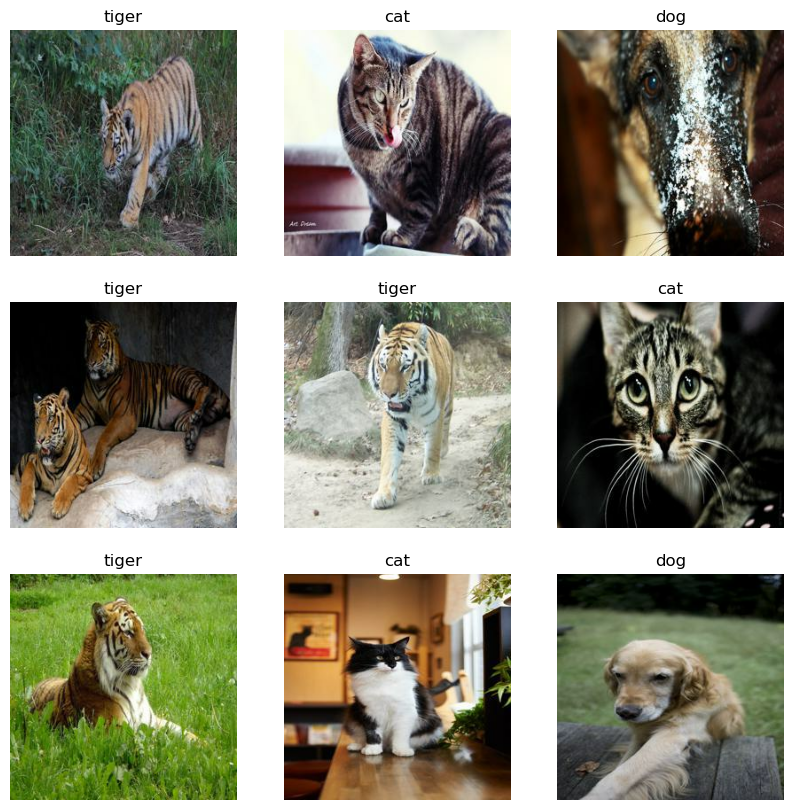

In [7]:
# class_names=train_data.class_names
# print(class_names)
 
# plt.figure(figsize=(10,10))
# for image,label in train_data.take(1): #BatchDataset类型数据返回最多一个批次为包含图像数组和标签的元组，图像数组shape=(32,64,64,3),标签（32，1）
#     #print(image,label)
#     for i in range(9):
#         ax=plt.subplot(3,3,i+1)
#         plt.imshow(image[i].numpy().astype("uint8"))#转换为numpy形式的数组
#         plt.axis('off')
#         plt.title(class_names[label[i]])


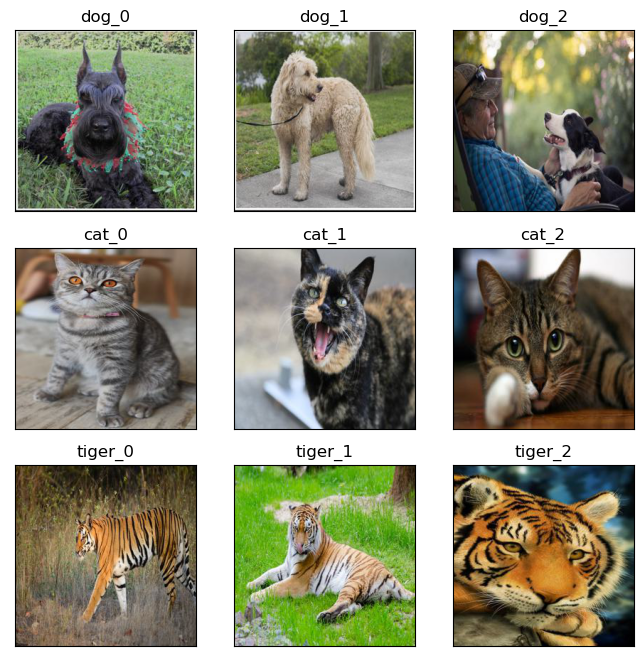

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(8, 8))
for i in range(3):
    if i ==0:
        for j in range(3):
            image1 = Image.open(keyword1 + f'_{3*i + j}.jpg') 
            ax[i, j].imshow(image1)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].set_title(keyword1 + f'_{j}')
    if i ==1:
        for j in range(3):
            image2 = Image.open(keyword2 + f'_{3*i + j}.jpg') 
            ax[i, j].imshow(image2)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].set_title(keyword2 + f'_{j}')
    if i ==2:
        for j in range(3):
            image3 = Image.open(keyword3 + f'_{3*i + j}.jpg') 
            ax[i, j].imshow(image3)
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            ax[i, j].set_title(keyword3 + f'_{j}')

In [29]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(8,(3,3),activation = "relu",padding='same',input_shape=(256,256,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),padding='same'))
model.add(tf.keras.layers.Conv2D(16,(3,3),activation = "relu",padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2),padding='same'))
model.add(tf.keras.layers.Conv2D(32,(3,3),activation = "relu",padding='same'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 256, 256, 8)       224       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 128, 128, 8)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 128, 128, 16)      1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 32)        4640      
                                                                 
 flatten_3 (Flatten)         (None, 131072)           

In [30]:
opt2 = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt2,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [31]:
history = model.fit(train_data, validation_data = validation_data, epochs=10)

Epoch 1/10
75/75 [==============================] - 38s 502ms/step - loss: 39.1619 - accuracy: 0.4487 - val_loss: 0.9482 - val_accuracy: 0.5367
Epoch 2/10
75/75 [==============================] - 66s 881ms/step - loss: 0.7361 - accuracy: 0.6783 - val_loss: 0.9723 - val_accuracy: 0.5433
Epoch 3/10
75/75 [==============================] - 53s 706ms/step - loss: 0.3899 - accuracy: 0.8462 - val_loss: 1.0162 - val_accuracy: 0.6300
Epoch 4/10
75/75 [==============================] - 38s 499ms/step - loss: 0.2105 - accuracy: 0.9333 - val_loss: 1.0890 - val_accuracy: 0.6467
Epoch 5/10
75/75 [==============================] - 39s 513ms/step - loss: 0.1251 - accuracy: 0.9683 - val_loss: 1.7980 - val_accuracy: 0.6367
Epoch 6/10
75/75 [==============================] - 168s 2s/step - loss: 0.0907 - accuracy: 0.9796 - val_loss: 1.4961 - val_accuracy: 0.6400
Epoch 7/10
75/75 [==============================] - 104s 1s/step - loss: 0.0387 - accuracy: 0.9904 - val_loss: 1.5599 - val_accuracy: 0.6433
Ep

In [42]:
personal_token = '5381121637:AAF2-jc8xpvlF--HsZbhylaXSBpYnEZTMxM'

In [43]:
ping_url = 'https://api.telegram.org/bot'+str(personal_token)+'/getUpdates'
response = requests.get(ping_url).json()
response

{'ok': True,
 'result': [{'update_id': 528697554,
   'message': {'message_id': 2,
    'from': {'id': 5085258248,
     'is_bot': False,
     'first_name': 's',
     'last_name': 'h',
     'language_code': 'zh-hans'},
    'chat': {'id': 5085258248,
     'first_name': 's',
     'last_name': 'h',
     'type': 'private'},
    'date': 1674463867,
    'text': '111'}},
  {'update_id': 528697555,
   'message': {'message_id': 3,
    'from': {'id': 5085258248,
     'is_bot': False,
     'first_name': 's',
     'last_name': 'h',
     'language_code': 'zh-hans'},
    'chat': {'id': 5085258248,
     'first_name': 's',
     'last_name': 'h',
     'type': 'private'},
    'date': 1674463868,
    'text': '111'}}]}

In [44]:
chat_id = response['result'][0]['message']['chat']['id']

In [54]:
ping_url = 'https://api.telegram.org/bot'+str(personal_token)+'/sendMessage?'+\
                    'chat_id='+str(chat_id)+\
                    '&parse_mode=Markdown'+\
                    '&text='+ 'hahaha'
response = requests.get(ping_url)
ping_url

'https://api.telegram.org/bot5381121637:AAF2-jc8xpvlF--HsZbhylaXSBpYnEZTMxM/sendMessage?chat_id=5085258248&parse_mode=Markdown&text=hahaha'

In [55]:
last_message_id = response['result'][-1]["message"]["message_id"]

TypeError: 'Response' object is not subscriptable

In [56]:
class BotCallback(tf.keras.callbacks.Callback):
    def __init__(self,personal_token):
        self.personal_token = personal_token
        self.ping_url = 'https://api.telegram.org/bot'+str(self.personal_token)+'/getUpdates'
        self.response = requests.get(self.ping_url).json()
        self.chat_id = self.response['result'][0]['message']['chat']['id']

    def send_message(self,message):
        self.ping_url = 'https://api.telegram.org/bot'+str(self.personal_token)+'/sendMessage?'+\
                        'chat_id='+str(self.chat_id)+\
                        '&parse_mode=Markdown'+\
                        '&text='+message
        self.response = requests.get(self.ping_url)

    def on_epoch_end(self, epoch, epoch_logs):
        # TODO
        pass